In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline 

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'PATH'
# ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

ticker and stock data

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

,PATH
Date,
2022-11-01 00:00:00-04:00,12.47
2022-12-01 00:00:00-05:00,12.71
2023-01-01 00:00:00-05:00,14.57


change index to add in metriks df

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.head(3)

,PATH
Date_index,
2021-05-01,79.820000
2021-06-01,67.930000
2021-07-01,62.560001


key_metrics

In [7]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,averageInventory,averagePayables,averageReceivables,bookValuePerShare,capexPerShare,capexToDepreciation,capexToOperatingCashFlow,capexToRevenue,cashPerShare,currentRatio,daysOfInventoryOnHand,daysPayablesOutstanding,daysSalesOutstanding,debtToAssets,debtToEquity,dividendYield,earningsYield,enterpriseValue,enterpriseValueOverEBITDA,evToFreeCashFlow,evToOperatingCashFlow,evToSales,freeCashFlowPerShare,freeCashFlowYield,grahamNetNet,grahamNumber,incomeQuality,intangiblesToTotalAssets,interestCoverage,interestDebtPerShare,inventoryTurnover,investedCapital,marketCap,netCurrentAssetValue,netDebtToEBITDA,netIncomePerShare,operatingCashFlowPerShare,payablesTurnover,payoutRatio,pbRatio,peRatio,period,pfcfRatio,pocfratio,priceToSalesRatio,ptbRatio,receivablesTurnover,researchAndDdevelopementToRevenue,returnOnTangibleAssets,revenuePerShare,roe,roic,salesGeneralAndAdministrativeToRevenue,shareholdersEquityPerShare,stockBasedCompensationToRevenue,tangibleAssetValue,tangibleBookValuePerShare,workingCapital
2022,None,9098500,277290500,3.905044,-0.026536,-0.553859,0.237614,-0.014637,3.789681,4.31715,0,24.889115,137.815673,0.252885,0.025934,None,-0.031474,14981754005.709999,-30.969906,-220.245417,-272.578899,16.790945,-0.138212,-0.004073,2.981285,9.686608,0.104575,0.02736,-141.071811,0.111642,None,0.026742,16699082005.709999,1626768000,3.550017,-1.067911,-0.111676,14.665046,0,8.688763,-31.772311,FY,-245.491701,-303.824064,18.715657,8.688763,2.648465,0.310066,-0.210061,1.812921,-0.27347,-0.244967,0.28018,3.905044,0.577845,1851536000,3.76204,1749800000


In [8]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()

In [9]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [10]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

add_percent_columns

In [11]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)

Vizualization key_metrics

In [12]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

In [13]:
''' necessary columns '''

km0 = f'{ticker}'
km1 = f'change % {ticker}'
km2 = 'SNP'
km3 = 'change % SNP'
km4 = 'change % debtToAssets'

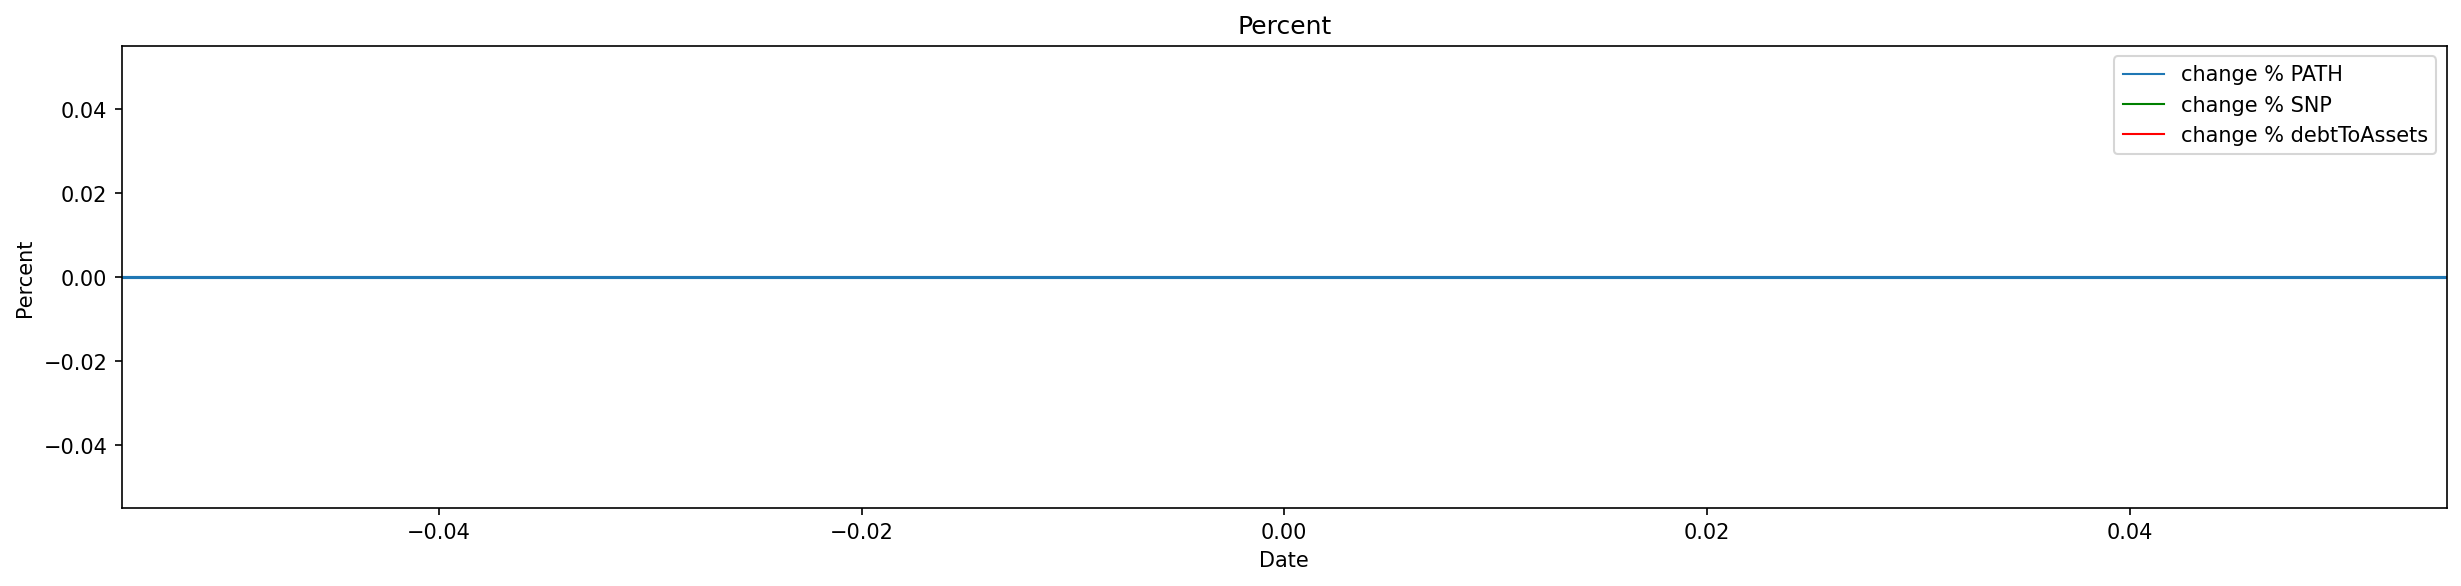

In [14]:
# plot size
figure(figsize=(20,4), dpi=150)
plt.axhline(y=0, linestyle='-')


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[km1],lw=1, label=km1)
plt.plot(df_with_changes_key[km3],'g',lw=1, label=km3)
plt.plot(df_with_changes_key[km4],'r',lw=1, label=km4)

# Add a legend to the axis
plt.legend()

plt.show()